# Clase 20 de septiembre de 2021 #
## Fundamentos de Probabilidad ##
### Probabilidad ###
La probabilidad es el marco que nos permite cuantificar la incertidumbre.  

**Espacio muestral:** Es el conjunto de todos los posibles resultados de un experimento y se le denota por $\Omega$.

**Evento:** Subconjunto del espacio muestral.

**Axiomas** de la probabilidad:
1. $0 \leq P(A) \leq 1$
2. $P(\Omega)=1$
3. $P(A_1\cup A_2\cup ... \cup A_n)=\sum_{i=1}^n P(A_i)$ si los eventos $A_n$ son mutuamente excluyentes

$ P(A^c) = 1 - P(A) $

Por ejemplo si nuestro experimento es lanzar un dado de 6 caras entonces, $\Omega=[1,2,3,4,5,6]$ y $A$ sea el evento  

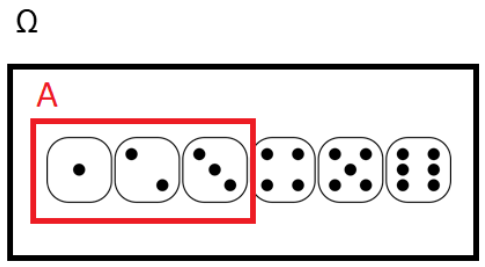

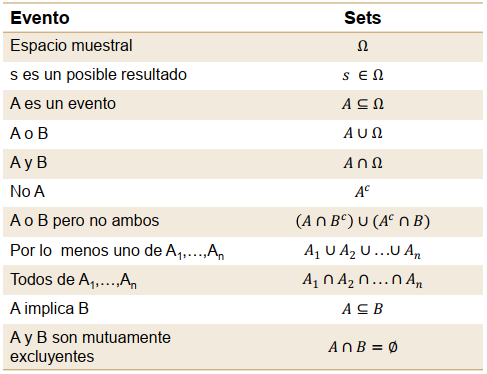


In [16]:
# Operaciones con sets
A = set([1,2,2,2,2])
B = set([3,4])

print(A)
print('B:', B)

# Añadir elementos a un set
A.update([3,4,5,6])
print(A)

{1, 2}
B: {3, 4}
{1, 2, 3, 4, 5, 6}


In [17]:
# Quitar elementos de un set
A.remove(6)
print('A:',A)

A: {1, 2, 3, 4, 5}


In [27]:
# Verificar si un elemento est dentro de un set
print(10 in A)

# Subset
print('B es un subset de A:', B.issubset(A))
print('A es un subset de B:',A.issubset(B))

# Union
C = set([5,6,7,8,9,10])
print('C:', C)
print('Union:',A.union(C))
print('Union:',(C|A))

# Interseccion
print(A.intersection(C))
print(A&C)

# Diferencia contiene todos los elementos en A pero no en C
print(A.difference(C))

# Diferencia simetrica nos va a dar el conjunto de todos los elementos que estan en uno de los conjuntos pero no en ambos
print(A.symmetric_difference(C))

False
B es un subset de A: True
A es un subset de B: False
C: {5, 6, 7, 8, 9, 10}
Union: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Union: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{5}
{5}
{1, 2, 3, 4}
{6, 7, 8, 9, 10}
{1, 2, 3, 4, 6, 7, 8, 9, 10}


Algunos espacios muestrales, como en el caso del dado, tienen resultados igualmente probables. En esos casos el cálculo de la probabilidad se vuelve un problema de conteo:  
$ P(A) = \frac{\#\;resultados\;favorables\;A}{\#\;resultados\;totales\;\Omega} $

$ P(E) = lim_{n->\infty} \frac{n(E)}{n} $

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [93]:
@widgets.interact(n_tiros=(10,10000), continuous_update=False)
def simular_dado(n_tiros):
    resultados = [1,2,3,4,5,6]
    tiros = np.random.choice(resultados, p=[1/6.]*6, size=n_tiros)
    
    # Contar cuantos resultados tenemos de cada numero
    count = []
    for i in range(len(resultados)):
        count.append(sum(tiros==i+1)/n_tiros)
    
    plt.bar(np.arange(1,7),count)
    plt.show()

interactive(children=(IntSlider(value=5005, description='n_tiros', max=10000, min=10), Output()), _dom_classes…

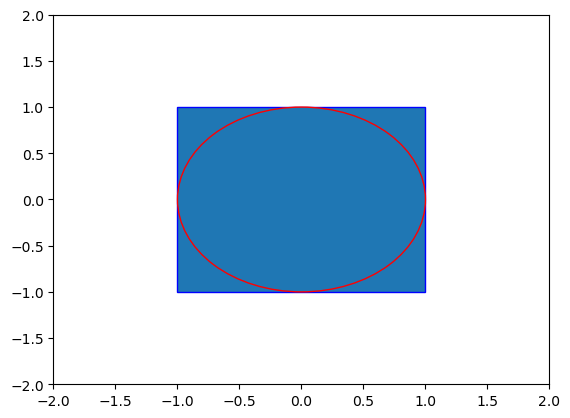

In [104]:
# Probabilidad de lanzar un dardo
plt.axes()
rectangle = plt.Rectangle((-1, -1), 2, 2, ec='blue')
circle = plt.Circle((0,0),1,ec='red')
plt.gca().add_patch(rectangle)
plt.gca().add_patch(circle)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

$ r^2 = x^2 + y^2$

N dentro circulo: 7842


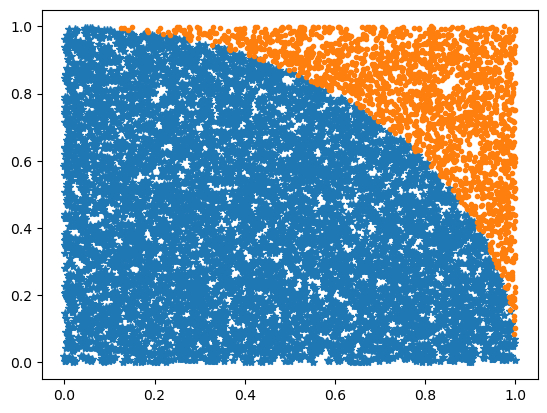

In [138]:
n = 10000
dardo = np.random.random((n,2))

radio = np.sqrt(np.sum(dardo**2,axis=1))

dentro_circulo = radio <= 1

print('N dentro circulo:', sum(dentro_circulo))

plt.plot(dardo[dentro_circulo][:,0],dardo[dentro_circulo][:,1], '*')
plt.plot(dardo[~dentro_circulo][:,0],dardo[~dentro_circulo][:,1], '.')
plt.show()

In [136]:
(sum(dentro_circulo)/n)*4

3.1416

Con esto podemos estimar el valor de pi, a este método se le conoce como "Integración Monte Carlo"

### Probabilidad condicional ###
La probabilidad condicional generalmente se utiliza para examinar eventos en subconjuntos del espacio muestral. Específicamente, estamos interesados en la probabilidad de que un evento ocurra solo si otro evento ha ocurrido primero. Por ejemplo: la probabilidad de que una institución financiera quiebre dado que otra institución financiera ha quebrado.  
$ P(A|B)=\frac{P(A\cap B)}{P(B)} $  

*Ejemplo:* Fallos de SIFIs (Systemically Important Financial Institutions)  
Supongamos que la probabilidad de que falle por lo menos una institución financiera en un año cualquiera es del 1%.  
Supongamos que si quiebra una institución financiera entonces hay un 20% de probabilidad de que el numero de instituciones que fallen sea exactamente 1, 2, 3, 4 o 5.  

Para un año cualquiera ¿cuál es la probabilidad de que falle una institución? **R: 0.20%**  
$E_1$ es la probabilidad de que falle por lo menos una institución.  
$ P(E_1) = 1\% $

¿Cuál sería la probabilidad de que fallen por lo menos dos instituciones financieras dado que falló por lo menos una?  
$ E_2 $ va a ser el evento en el que dos o más instituciones financieras fallen.  
$ P(E_2|E_1) = 80\% $

### Independencia ###
Se dice que dos eventos son independientes si el resultado de un evento no altera tu expectativa sobre si el otro evento ocurrirá o no.  
$P(A|B)=P(A)$  
$ P(A\cap B) = P(A)P(B) $ 

**Ejercicio:**
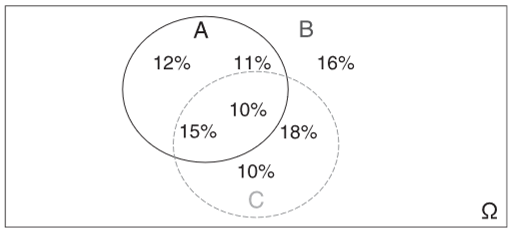

Dada la imagen anterior, calcula:  
1. $ P(A) = 0.12 + 0.11 +0.15+0.10 = 0.48$
1. $ P(A|B) =  (0.11 + 0.10) / (0.11 + 0.10 + 0.18 + 0.16) = .388$
1. $ P(B|A) = 0.21/ 0.48 = 0.4375 $
1. $ P(A\cap B\cap C) = 0.10 $ 
1. $ P(B|A\cap C) $ 
1. $ P(A\cap B|C) $ 
1. $ P(A\cup B|C) $ 
1. ¿Alguno de estos pares de eventos es independiente?

**Ejercicio**  
Si es un volado que un administrador de un portafolio tenga mejores rendimientos anuales que su benchmark, y los rednimientos anuales son independientes, ¿cuál es la probabilidad de que un administrador de un portafolio obtenga mejores rendimientos que el benchmark 10 años seguidos?

### Variables Aleatorias ###  
Es una función que asigna un número a los eventos de un espacio muestreal.  
*Discretas*: Solo pueden tomar ciertos valores discretos.  
*Continuas*: Pueden tomar cualquier valor, generalmente hablando, dentro de cierto intevalo  

Ejemplos: precio de un asset, retornos, tasas de interés, P&L de un portafolio, etc...

**Distribuciones de probabilidad**  
$x_k$ discreta: $\sum_k P(x_k)=1$  
$x$ continua: $\int_{-\infty}^{\infty}P(x)dx=1$

**Función de distribución acumulada**  
La función de distribución acumulada, o CDF por sus siglas en inglés, nos da la probabilidad de que X es igual o menor que un valor dado.  
$ F(x)=P(X<x)=\int_{-\infty}^x P(x)dx $  

$ p(x) = \frac{dF(x)}{dx} $  

$ P(a < X < b) = F(b) - F(a) $

2.3333333333333335

### Momentos ###  
**Valor esperado**: Promedio ponderado por probabilidad.  
$E[X]=\sum xP(X=x)$  

Las funciones de variables aleatorias también son variables aleatorias.  
$E[f(X)]=\sum f(x)P(X=x)$

**Opciones**  
Son contratos en los que el comprador adquiere el derecho, más no la obligación, de comprar o vender un subyacente a un precio previamente pactado. El vendedor SÍ tiene la obligación de comprarle o venderle el subyacente al comprador de la opción.  
Por tipo de opción:
- Puts: Opción de compra
- Calls: Opción de venta  

Por fecha de ejercicio:
- Americanas: Se puede ejercer la opción en cualquier fecha antes del vencimiento.
- Europeas: Se puede ejercer la opción solo en el vencimiento.
- Mixtas: Durante cierto plazo son europeas y durante otro plazo son americanas.

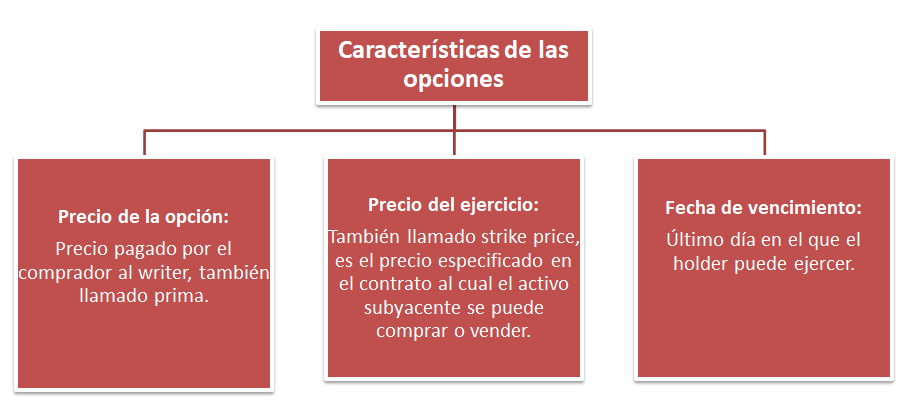

**Payoff de una opción**  
Call: $ Payoff = max(0, S-K) $  
Put: $ Payoff = max(0, K-S) $

**Momentos:** Son un set de métricas descriptivas usadas comúnmente para explicar características importantes de las variables aleatorias.  

1er momento:  
$\mu_1 = E[X]$  

2do momento en adelante:  
$ \mu_r = E[(X-E[X])^r $  

A los primeros cuatro momentos se les conoce como: *promedio, varianza, skew y curtosis.*  

- Promedio: localización de la distribución.
- $ \mu=E[X] $


- Varianza: es una medida de dispersión de una variable aleatoria.
- $ \sigma^2 = E[(X-E[X])^2]=E[(X-\mu)^2] $


- Skew: es una medida de la asimetría en una distribución ya que el cubo depende del signo de la diferencia.
- $ skew(X)=E[(\frac{X-\mu}{\sigma})^3] $


- Curtosis: es una medida análoga al skew, mide valores extremos
- $ curtosis(X) = E[(\frac{X-\mu}{\sigma})^4] $  

**Ejercicio**  
Calcula el promedio, varianza, skew y curtosis de los retornos del S&P500. (Ticker yahoo finance: "^GSPC")

### Variables aleatorias discretas ###

### Variables aleatorias continuas ###